### 평균 경로 길이(평균 최단 경로 길이) 계산

In [1]:
import networkx as nx

1

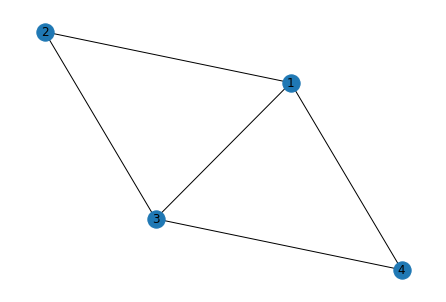

In [199]:
# 가중치가 없는 네트워크

g = nx.Graph()
g.add_nodes_from([1,2,3,4])
g.add_edges_from([(1,2),(2,3),(1,3),(1,4)])
g.add_edge(3,4)
nx.draw(g, with_labels = True)
nx.radius(g)

In [48]:
nx.has_path(g,3,4)

True

In [47]:
list(nx.all_simple_paths(g,3,4)) # 노드 3에서 노드 4로 가는 모든 경로

[[3, 2, 1, 4], [3, 1, 4], [3, 4]]

In [46]:
nx.shortest_path(g,3,4) # 노드 3에서 노드 4로 가는 최단 경로

[3, 4]

In [45]:
nx.shortest_path_length(g,3,4) # 노드 3에서 노드 4로 가는 최단 경로 길이

1

In [200]:
nx.shortest_path(g) # 모든 경로 확인

{1: {1: [1], 2: [1, 2], 3: [1, 3], 4: [1, 4]},
 2: {2: [2], 1: [2, 1], 3: [2, 3], 4: [2, 1, 4]},
 3: {3: [3], 2: [3, 2], 1: [3, 1], 4: [3, 4]},
 4: {4: [4], 1: [4, 1], 3: [4, 3], 2: [4, 1, 2]}}

In [14]:
nx.shortest_path_length(g)

<generator object all_pairs_shortest_path_length at 0x0000025E20265580>

In [43]:
nx.average_shortest_path_length(g) # g의 평균 최단 경로 길이

1.1666666666666667

-0.40824829046386546

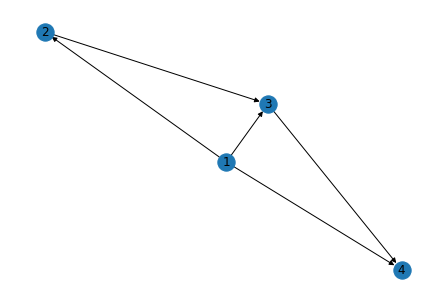

In [72]:
# 가중치가 있는 방향성 네트워크

w = nx.DiGraph() 
w.add_nodes_from([1,2,3,4])
w.add_edge(1,2, weight = 3)
w.add_edge(2,3, weight = 1) 
w.add_edge(1,3, weight = 5)
w.add_edge(1,4, weight = 4)
w.add_edge(3,4, weight = 2)
nx.draw(w, with_labels = True )
nx.degree_assortativity_coefficient(w) # 동류성 계수

In [35]:
nx.has_path(w,3,4)

False

In [41]:
print(nx.shortest_path_length(w,2,4))
print(nx.shortest_path_length(w,2,4,'weight'))

2
3


In [36]:
nx.average_shortest_path_length(w) 

0.3333333333333333

-1.0


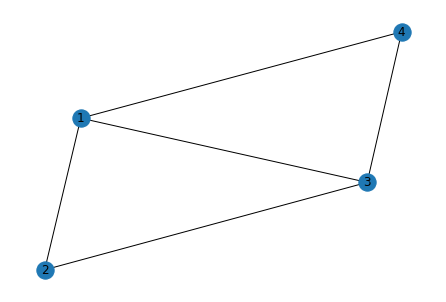

In [82]:
import scipy.stats

nx.draw(g, with_labels = True)
knn_dict = nx.average_degree_connectivity(g)
k,knn = list(knn_dict.keys()), list(knn_dict.values())
r, p_value = scipy.stats.pearsonr(k,knn)
print(r)

In [77]:
nx.draw(w, with_labels = True)
knn_dict = nx.average_degree_connectivity(w)
k,knn = list(knn_dict.keys()), list(knn_dict.values())
r, p_value = scipy.stats.pearsonr(k,knn)
print(r)

1.0

1.0

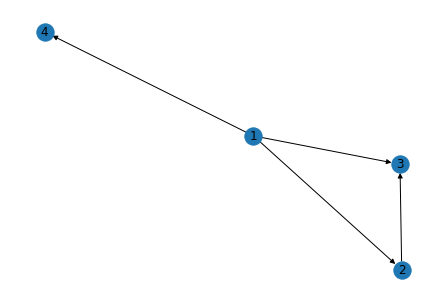

In [4]:
# 가중치가 있는 방향성 네트워크

f = nx.DiGraph() 
f.add_nodes_from([1,2,3,4])
f.add_edge(1,2, weight = 3)
f.add_edge(2,3, weight = 1) 
f.add_edge(1,3, weight = 5)
f.add_edge(1,4, weight = 4)
nx.draw(f, with_labels = True)
nx.average_shortest_path_length(f,'weight')

### 연결상태와 덩어리

In [7]:
import networkx as nx

k4 = nx.complete_graph(4)
print(nx.is_connected(k4))

True


False

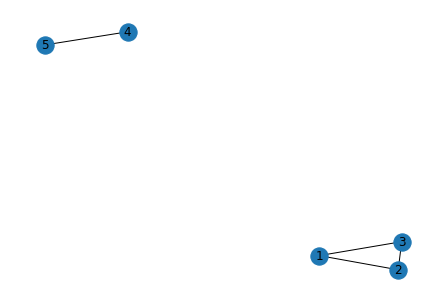

In [10]:
g = nx.Graph()

nx.add_cycle(g,[1,2,3])
g.add_edge(4,5)

nx.draw(g, with_labels = True)
nx.is_connected(g)

In [15]:
comps = sorted(nx.connected_components(g),key=len, reverse=True)
nodes_in_giant_comp = comps[0]
gc = nx.subgraph(g, nodes_in_giant_comp)
nx.is_connected(gc)

True

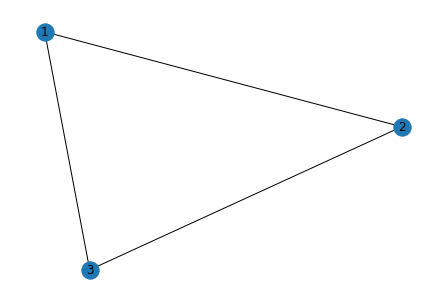

In [16]:
core_nodes = max(nx.connected_components(g), key = len)
core = g.subgraph(core_nodes)

nx.draw(core, with_labels = True)

### Directed paths & components

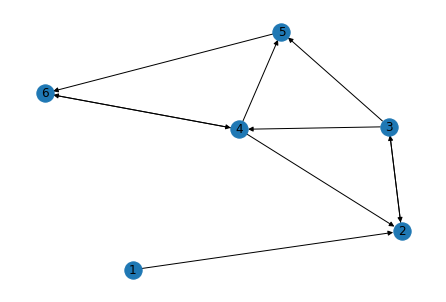

In [18]:
d = nx.DiGraph()
d.add_edges_from([
    (1,2),
    (2,3),
    (3,2),(3,4),(3,5),
    (4,2),(4,5),(4,6),
    (5,6),
    (6,4)
    ])

nx.draw(d, with_labels = True)

In [19]:
nx.has_path(d,1,4)

True

In [20]:
nx.has_path(d,4,1)

False

In [22]:
nx.shortest_path(d)

{1: {1: [1],
  2: [1, 2],
  3: [1, 2, 3],
  4: [1, 2, 3, 4],
  5: [1, 2, 3, 5],
  6: [1, 2, 3, 4, 6]},
 2: {2: [2], 3: [2, 3], 4: [2, 3, 4], 5: [2, 3, 5], 6: [2, 3, 4, 6]},
 3: {3: [3], 2: [3, 2], 4: [3, 4], 5: [3, 5], 6: [3, 4, 6]},
 4: {4: [4], 2: [4, 2], 5: [4, 5], 6: [4, 6], 3: [4, 2, 3]},
 5: {5: [5], 6: [5, 6], 4: [5, 6, 4], 2: [5, 6, 4, 2], 3: [5, 6, 4, 2, 3]},
 6: {6: [6], 4: [6, 4], 2: [6, 4, 2], 5: [6, 4, 5], 3: [6, 4, 2, 3]}}

In [24]:
nx.is_strongly_connected(d)

False

In [25]:
nx.is_weakly_connected(d)

True

In [26]:
list(nx.weakly_connected_components(d))

[{1, 2, 3, 4, 5, 6}]

In [27]:
list(nx.strongly_connected_components(d))

[{2, 3, 4, 5, 6}, {1}]

### 트리

In [28]:
k4 = nx.complete_graph(4)
nx.is_tree(k4)

False

In [29]:
p = nx.path_graph(4)
nx.is_tree(p)

True

### 삼각구조

In [32]:
nx.triangles(g) # 노드의 딕셔너리 -> 삼각구조 개수  

{1: 1, 2: 1, 3: 1, 4: 0, 5: 0}

In [34]:
nx.clustering(g) # 노드의 딕셔너리 -> 뭉침 계수

{1: 1.0, 2: 1.0, 3: 1.0, 4: 0, 5: 0}

In [35]:
nx.average_clustering(g) # 네트워크의 뭉침 계수

0.6

## 문제 2.41

In [36]:
import networkx as nx

In [39]:
G = nx.read_edgelist('socfb-Northwestern25.edges.gz')

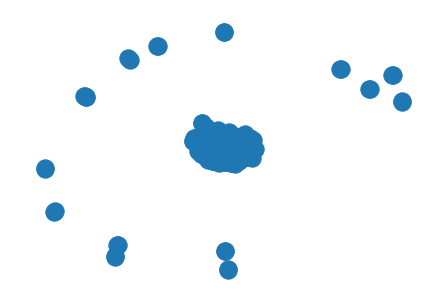

In [42]:
nx.draw(G)

In [43]:
G.number_of_edges()

488337

In [44]:
G.number_of_nodes()

10567

In [46]:
nx.is_connected(d)

NetworkXNotImplemented: not implemented for directed type

In [48]:
nx.is_weakly_connected(d) # 약하게 연결된 네트워크

True

In [49]:
nx.density(G) # 조밀도

0.008747567709293077

In [52]:
nx.degree_assortativity_coefficient(G) # 동류성 계수

0.03444129080711028

In [57]:
nx.average_clustering(G) # 뭉침 계수

0.2379913948280604

In [198]:
import random
import warnings
warnings.filterwarnings('ignore')
import numpy as np

a = []
b = []

for i in range(0,100):
    for j in range(1):
       a.append(random.sample(G.nodes,2))
    b.append(nx.shortest_path_length(G,a[i][0],a[i][1]))
print(min(b)) # 최단 경로 길이
print(max(b)) # 지름
print(np.mean(b)) # 표본의 평균

1
5
2.76
